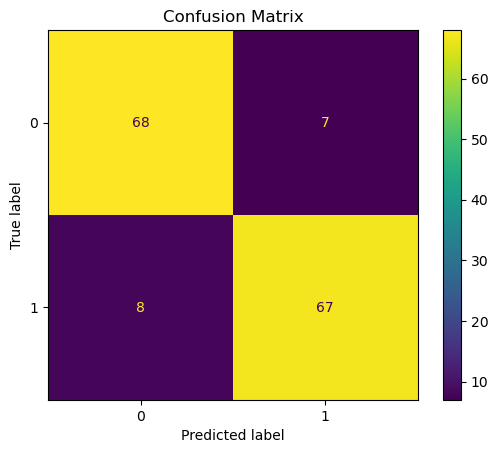

F1 Score: 0.8993288590604027
AUC-ROC Score: 0.9623111111111111


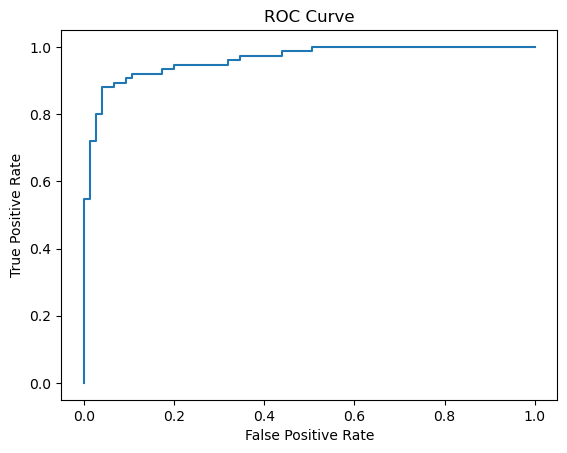

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    roc_auc_score,
    roc_curve
)
from sklearn.datasets import make_classification

# Generate sample classification data
X, y = make_classification(
    n_samples=500,
    n_features=5,
    n_classes=2,
    random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# 1️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 2️⃣ F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# 3️⃣ AUC-ROC Score
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
